In [7]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import string

In [2]:
!pip install nltk


In [9]:
nltk.download('stopwords')

# Charger les données
file_path = "final_dataset1.csv"  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path)
df = df[['cleaned_content', 'sentiment']]

# Renommer les colonnes pour simplifier l'utilisation
df.columns = ['review', 'sentiment']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Description du dataset
print("Aperçu des données :")
print(df.head())


Aperçu des données :
                                              review sentiment
0  le revêtement céramique pour voiture été une e...  negative
1  cest facile à assembler décemment robuste pour...  positive
2                               fonctionne très bien  positive
3  lowa barcha l brosse w lutilisation mteha sehl...  positive
4                            produit fonctionne bien  positive


In [12]:
print(f"Dimensions du dataset : {df.shape}")
print("Répartition des sentiments :")
print(df['sentiment'].value_counts())


Dimensions du dataset : (1425, 2)
Répartition des sentiments :
sentiment
positive    923
negative    384
neutral     118
Name: count, dtype: int64


In [13]:
print("Informations sur le dataset :")
print(df.info())


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1425 non-null   object
 1   sentiment  1425 non-null   object
dtypes: object(2)
memory usage: 22.4+ KB
None


In [14]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
review       0
sentiment    0
dtype: int64


In [30]:
# Fonction de nettoyage et de normalisation
def process(text):
    """Nettoie et normalise le texte."""
    text = text.lower()  # Convertir en minuscules
    text = ''.join([t for t in text if t not in string.punctuation])  # Supprimer la ponctuation
    text = [t for t in text.split() if t not in stopwords.words('french')]  # Supprimer les mots vides
    st = Stemmer()
    text = [st.stem(t) for t in text]  # Appliquer le stemming
    return ' '.join(text)

# Appliquer le nettoyage au dataset
df['processed_review'] = df['review'].apply(process)

In [16]:
# TfidfVectorizer pour transformer les avis en vecteurs
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['processed_review'])

In [17]:
# Exemple d'avis et transformation TF-IDF
mess = df.iloc[2]['review']
print(mess)
print(tfidfv.transform([mess]))

fonctionne très bien
  (0, 34)	0.2785242332056367
  (0, 24)	0.30266146925589965
  (0, 22)	0.1460546914355228
  (0, 19)	0.3256400508720124
  (0, 18)	0.6560161780519471
  (0, 13)	0.2865872571622245
  (0, 10)	0.1922410784322829
  (0, 9)	0.15252126765743262
  (0, 7)	0.16460019079884744
  (0, 6)	0.18872946700413282
  (0, 0)	0.26081791586823583


In [18]:
# Visualiser les scores TF-IDF
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'),
              tfidfv.get_feature_names_out()[i], sep='\t')

index	idf	tfidf	term
0	1.0198	0.2608	 
6	1.4759	0.1887	b
7	1.2872	0.1646	c
9	1.1928	0.1525	e
10	1.5034	0.1922	f
13	1.1206	0.2866	i
18	1.2826	0.6560	n
19	1.2733	0.3256	o
22	1.1422	0.1461	r
24	1.1834	0.3027	t
34	2.1781	0.2785	è


In [19]:
# MultinomialNB pour entraîner un classificateur bayésien naïf
sentiment_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)),  # Convertir les messages en vecteurs TF-IDF
    ('classifier', MultinomialNB())                    # Classificateur Bayésien Naïf
])

In [20]:
# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.30, random_state=21)
sentiment_filter.fit(x_train, y_train)


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x00000227C6284670>)),
                ('classifier', MultinomialNB())])

In [47]:
# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = sentiment_filter.predict(x_train)
y_test_pred = sentiment_filter.predict(x_test)

# Calcul des métriques sur l'ensemble d'entraînement
from sklearn.metrics import accuracy_score, classification_report
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Précision sur l'entraînement :", train_accuracy)

# Calcul des métriques sur l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Précision sur le test :", test_accuracy)

# Rapport détaillé
print("\nRapport sur l'ensemble d'entraînement :\n", classification_report(y_train, y_train_pred))
print("\nRapport sur l'ensemble de test :\n", classification_report(y_test, y_test_pred))


Précision sur l'entraînement : 0.7432296890672017
Précision sur le test : 0.7733644859813084

Rapport sur l'ensemble d'entraînement :
               precision    recall  f1-score   support

    negative       0.71      0.42      0.53       275
     neutral       1.00      0.09      0.16        89
    positive       0.75      0.97      0.85       633

    accuracy                           0.74       997
   macro avg       0.82      0.50      0.51       997
weighted avg       0.76      0.74      0.70       997


Rapport sur l'ensemble de test :
               precision    recall  f1-score   support

    negative       0.67      0.41      0.51       109
     neutral       1.00      0.14      0.24        29
    positive       0.79      0.97      0.87       290

    accuracy                           0.77       428
   macro avg       0.82      0.51      0.54       428
weighted avg       0.77      0.77      0.74       428



In [21]:
# Prédictions sur les données de test
predictions = sentiment_filter.predict(x_test)
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong predictions', count)


Total number of test cases 428
Number of wrong predictions 97


In [22]:
# Calculer le Rappel, Précision et F1-Score
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    negative       0.67      0.41      0.51       109
     neutral       1.00      0.14      0.24        29
    positive       0.79      0.97      0.87       290

    accuracy                           0.77       428
   macro avg       0.82      0.51      0.54       428
weighted avg       0.77      0.77      0.74       428



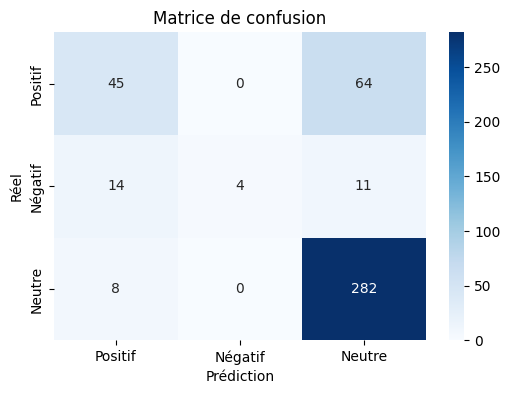

In [23]:
# Matrice de confusion
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positif', 'Négatif', 'Neutre'], yticklabels=['Positif', 'Négatif', 'Neutre'])
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()

In [24]:
# Visualisation des erreurs de classification
errors_as_positive = x_test[(predictions == 'Positif') & (y_test != 'Positif')]
errors_as_negative = x_test[(predictions == 'Négatif') & (y_test != 'Négatif')]
errors_as_neutral = x_test[(predictions == 'Neutre') & (y_test != 'Neutre')]


In [25]:
# Convertir les erreurs en DataFrame
errors_as_positive = pd.DataFrame({'Message': errors_as_positive})
errors_as_negative = pd.DataFrame({'Message': errors_as_negative})
errors_as_neutral = pd.DataFrame({'Message': errors_as_neutral})


In [26]:
# Afficher les erreurs mal classées
print("Messages mal classés comme Positif :\n", errors_as_positive)
print("Messages mal classés comme Négatif :\n", errors_as_negative)
print("Messages mal classés comme Neutre :\n", errors_as_neutral)


Messages mal classés comme Positif :
 Empty DataFrame
Columns: [Message]
Index: []
Messages mal classés comme Négatif :
 Empty DataFrame
Columns: [Message]
Index: []
Messages mal classés comme Neutre :
 Empty DataFrame
Columns: [Message]
Index: []


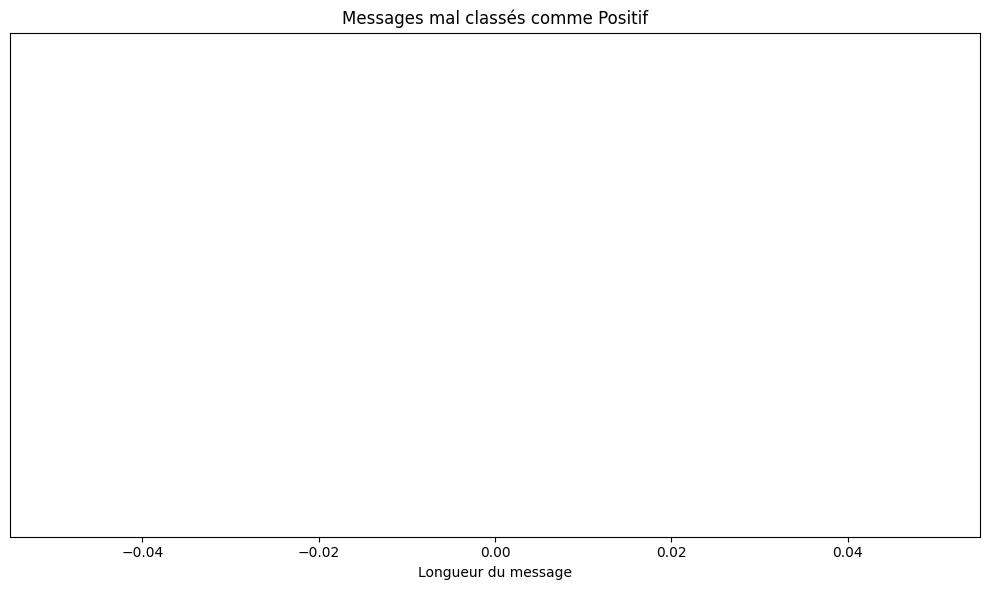

In [27]:
# Visualisation des erreurs de classification (longueur des messages)
plt.figure(figsize=(10, 6))
plt.barh(range(len(errors_as_positive)), [len(msg) for msg in errors_as_positive['Message']])
plt.yticks(range(len(errors_as_positive)), errors_as_positive['Message'], fontsize=8)
plt.xlabel("Longueur du message")
plt.title("Messages mal classés comme Positif")
plt.tight_layout()
plt.show()

In [41]:
# Prédire un avis donné
test_message = ["The service was excellent"]
result = sentiment_filter.predict(test_message)
print("L'avis est classé comme :", result[0])  # Positif, Négatif ou Neutre


L'avis est classé comme : positive


In [42]:
# Prédire un avis avec une mention spécifique
test_message2 = ["khayeb"]
result2 = sentiment_filter.predict(test_message2)
print("L'avis est classé comme :", result2[0])  # Positif, Négatif ou Neutre


L'avis est classé comme : negative


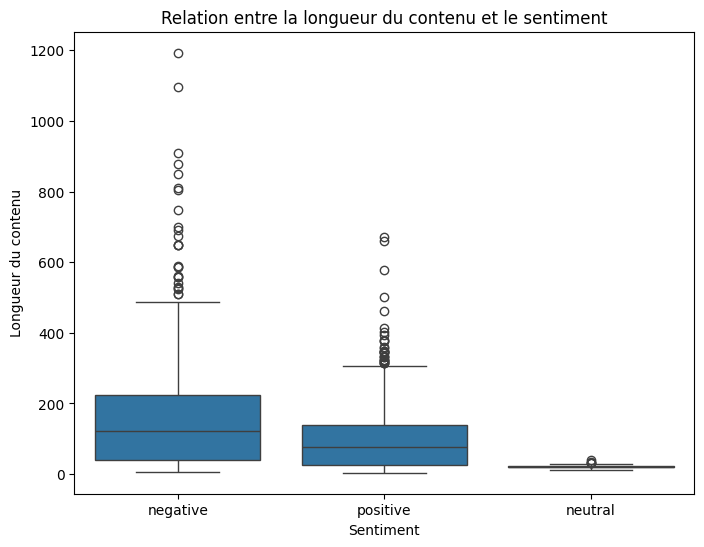

NameError: name 'model' is not defined

In [45]:
# Ajouter une colonne pour la longueur du contenu
df['content_length'] = df['review'].apply(len)

# Visualisation de la relation entre la longueur du contenu et le sentiment avec un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='content_length')
plt.title('Relation entre la longueur du contenu et le sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Longueur du contenu')
plt.show()

# Visualisation du nuage de points entre la longueur du contenu et les prédictions du modèle
# D'abord, nous appliquons les prédictions sur l'ensemble des données
df['predicted_sentiment'] = sentiment_model.predict(X)

# Visualisation du nuage de points entre la longueur du contenu et les sentiments prédits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='content_length', y='sentiment', hue='predicted_sentiment', palette='Set2')
plt.title('Nuage de points entre la longueur du contenu et les sentiments prédits')
plt.xlabel('Longueur du contenu')
plt.ylabel('Sentiment')
plt.legend(title='Sentiment prédit')
plt.show()

# Visualisation du nuage de points entre la longueur du contenu et les vrais sentiments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='content_length', y='sentiment', hue='sentiment', palette='Set1')
plt.title('Nuage de points entre la longueur du contenu et les vrais sentiments')
plt.xlabel('Longueur du contenu')
plt.ylabel('Sentiment')
plt.legend(title='Sentiment réel')
plt.show()


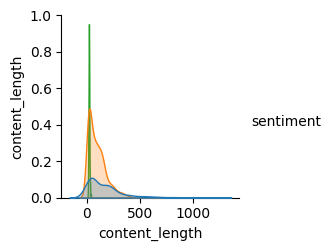

In [46]:
# Vous pouvez également visualiser des nuages de points pour des caractéristiques numériques
sns.pairplot(df, hue='sentiment')
plt.show()